In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from prophet import Prophet

In [2]:
df = pd.read_csv('Olympic_Swimming_Results_1912to2020.csv')
df = df.dropna(how="any")
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",00:06:17.000000,4
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",00:10:11.200000,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",00:10:20.200000,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",00:10:28.600000,3


In [3]:
def to_seconds(time_str):
    # Handle NaN values and "Didnt qualify"
    if pd.isna(time_str) or time_str == "Disqualified" or time_str == "Did not start" or  time_str == "Did not finish":
        return None    
    # If it's already a number, return it as a float
    if isinstance(time_str, (int, float)):
        return float(time_str)
    
    # Convert to string if it's not already
    time_str = str(time_str)
    
    # Remove any non-digit characters except colon and period
    time_str = re.sub(r'[^\d:.]', '', time_str)
    
    # Split the time string by colon
    parts = time_str.split(':')
    
    if len(parts) == 1:
        # Format: seconds.milliseconds (e.g., 51.98)
        return float(parts[0])
    
    elif len(parts) == 2:
        # Format: minutes:seconds.milliseconds (e.g., 14:39.7)
        minutes, seconds = parts
        return float(minutes) * 60 + float(seconds)
    
    elif len(parts) == 3:
        # Format: hours:minutes:seconds.milliseconds
        hours, minutes, seconds = parts
        return float(hours) * 3600 + float(minutes) * 60 + float(seconds)
    
    else:
        # Unexpected format
        print(f"Unexpected time format: {time_str}")
        return None

In [4]:
df['Results'] = df['Results'].apply(to_seconds)
df

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...,...
4353,Stockholm,1912,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",377.00,4
4355,Stockholm,1912,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",611.20,1
4356,Stockholm,1912,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",620.20,2
4357,Stockholm,1912,4x200,Freestyle,1,Men,GBR,"Thomas Sidney Battersby, Henry Taylor, John Ga...",628.60,3


In [5]:
df_gold = df.loc[df["Rank"] == 1]
series_gold = df_gold["Team"].value_counts()
country_gold = pd.DataFrame(series_gold).head(10)
country_gold

,count
Team,
USA,237
AUS,61
GDR,30
HUN,25
JPN,24
NED,17
CHN,14
GER,13
URS,11


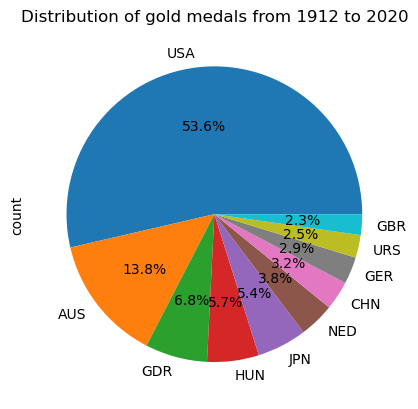

In [6]:
country_gold.plot(kind="pie", y="count", legend=False, autopct='%1.1f%%',title="Distribution of gold medals from 1912 to 2020")
plt.show()


In [7]:
series = df["Team"].value_counts()
series
country_df = pd.DataFrame(series)
country_top= country_df.head(10)
country_top

,count
Team,
USA,888
AUS,445
GBR,286
JPN,246
GER,225
CAN,198
HUN,173
GDR,144
SWE,137


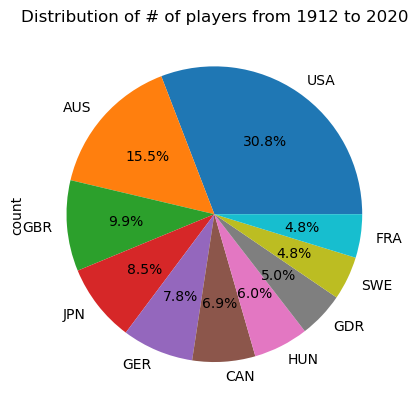

In [8]:
country_top.plot(kind="pie", y="count", legend=False, autopct='%1.1f%%', title = "Distribution of # of players from 1912 to 2020")
plt.show()
# plt.legend(loc="lower right")

                # plot = df.plot.pie(y='hours', title="Title", legend=False, \
                #    autopct='%1.1f%%', explode=(0, 0, 0.1), \
                #    shadow=True, startangle=0)

In [9]:
df = df.set_index("Year")
df

,Location,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
Year,,,,,,,,,
2020,Tokyo,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
2020,Tokyo,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52.00,2
2020,Tokyo,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
2020,Tokyo,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.30,4
2020,Tokyo,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4
...,...,...,...,...,...,...,...,...,...
1912,Stockholm,4x100,Freestyle,1,Women,AUT,"Margarete Adler, Bertha Zahourek, Josephine St...",377.00,4
1912,Stockholm,4x200,Freestyle,1,Men,AUS,"Malcolm Champion, Cecil Healy, Harold H. Hardw...",611.20,1
1912,Stockholm,4x200,Freestyle,1,Men,USA,"Duke Paoa Kahanamoku, Harry J. Hebner, Perry M...",620.20,2


In [10]:
popularity_gold = df_gold["Stroke"].value_counts()
popularity_gold


Stroke
Freestyle            245
Backstroke            76
Breaststroke          72
Butterfly             61
Individual medley     54
Medley                23
Name: count, dtype: int64

In [11]:
popularity_gold_df= pd.DataFrame(popularity_gold)
popularity_gold_df

,count
Stroke,
Freestyle,245
Backstroke,76
Breaststroke,72
Butterfly,61
Individual medley,54
Medley,23


In [12]:
popularity = df["Stroke"].value_counts()
popularity


Stroke
Freestyle            1954
Breaststroke          614
Backstroke            602
Butterfly             495
Individual medley     424
Medley                228
Name: count, dtype: int64

In [13]:
popularity_df = pd.DataFrame(popularity)
popularity_df


,count
Stroke,
Freestyle,1954
Breaststroke,614
Backstroke,602
Butterfly,495
Individual medley,424
Medley,228


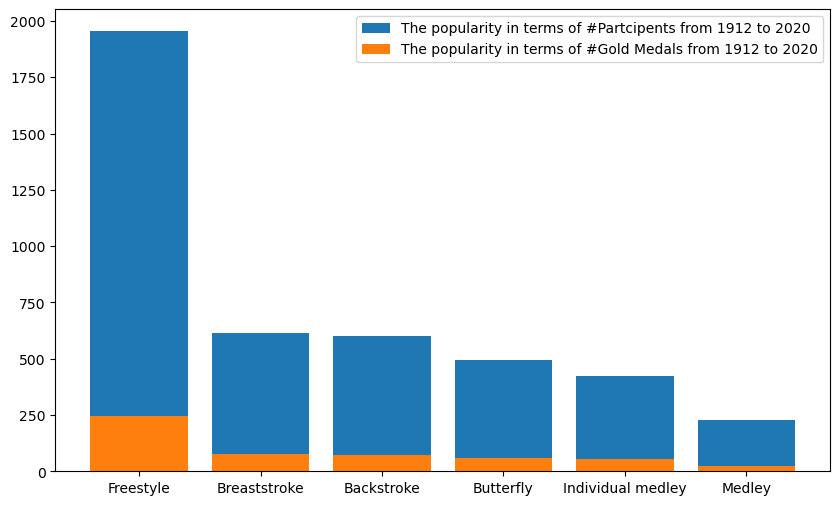

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(popularity_df.index, popularity_df["count"], label="The popularity in terms of #Partcipents from 1912 to 2020")
plt.bar(popularity_df.index, popularity_gold_df["count"],label="The popularity in terms of #Gold Medals from 1912 to 2020")
plt.legend(loc="best")
plt.show()

In [15]:
groupby_trend = df_gold.loc[(df_gold["Gender"] == "Men")&(df_gold["Distance (in meters)"] == "100m")&(df_gold["Stroke"] == "Backstroke")]
groupby_trend

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
224,Rio,2016,100m,Backstroke,0,Men,USA,Ryan Murphy,51.97,1
480,London,2012,100m,Backstroke,0,Men,USA,Matt Grevers,52.16,1
736,Beijing,2008,100m,Backstroke,0,Men,USA,Aaron Peirsol,52.54,1
992,Athens,2004,100m,Backstroke,0,Men,USA,Aaron Peirsol,54.06,1
1248,Sydney,2000,100m,Backstroke,0,Men,USA,Lenny Krayzelburg,53.72,1
1504,Atlanta,1996,100m,Backstroke,0,Men,USA,Jeff Norman Rouse,54.10,1
1760,Barcelona,1992,100m,Backstroke,0,Men,CAN,Mark Tewksbury,53.98,1
2008,Seoul,1988,100m,Backstroke,0,Men,JPN,Daichi Suzuki,55.05,1
2256,Angeles,1984,100m,Backstroke,0,Men,USA,Richard John Carey,55.79,1


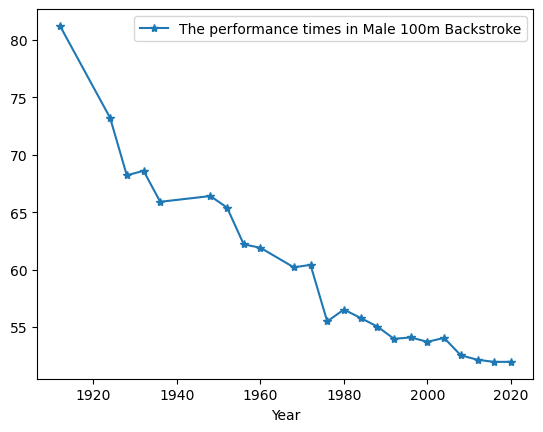

In [16]:

groupby_trend.plot(kind="line", x="Year", y= "Results", marker="*", label="The performance times in Male 100m Backstroke")
plt.show()


In [17]:
#2024 Top 3 Gold Medal winners by Country Prediction using Prophet

In [18]:
# Filter the dataset to include only gold medals (Rank == 1)
gold_medals = df[df['Rank'] == 1]

In [19]:
# Aggregate the total number of gold medals by each country
total_gold_medals_per_country = gold_medals.groupby('Team').size().reset_index(name='Total_Gold_Medals')

# Sort countries by the total number of gold medals and select the top 3
top_3_countries = total_gold_medals_per_country.sort_values(by='Total_Gold_Medals', ascending=False).head(3)['Team']
top_3_countries

41    USA
2     AUS
16    GDR
Name: Team, dtype: object

In [20]:
# Filter the dataset to only include the top 3 countries
gold_medals_top_3 = gold_medals[gold_medals['Team'].isin(top_3_countries)]

# Aggregate the number of gold medals by each country for each year
gold_medals_per_country = gold_medals_top_3.groupby(['Year', 'Team']).size().reset_index(name='Gold_Medals')
gold_medals_per_country

,Year,Team,Gold_Medals
0,1912,AUS,1
1,1912,USA,2
2,1920,USA,3
3,1924,AUS,1
4,1924,USA,8
5,1928,USA,5
6,1932,AUS,1
7,1932,USA,5
8,1936,USA,2
9,1948,USA,7


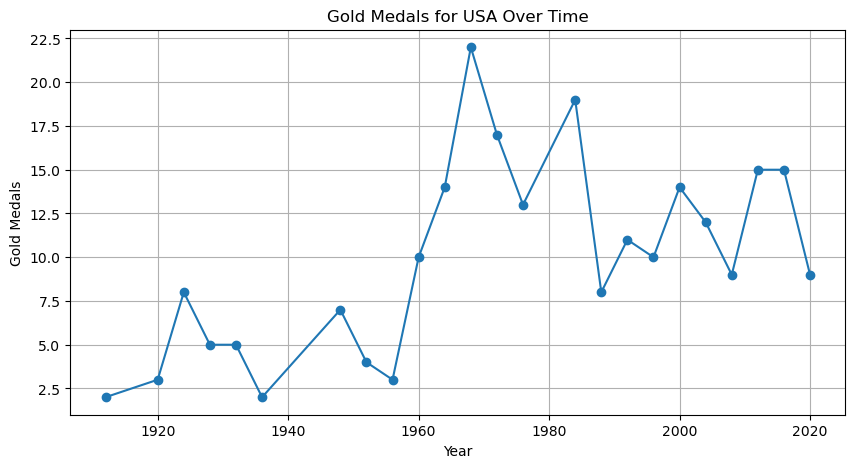

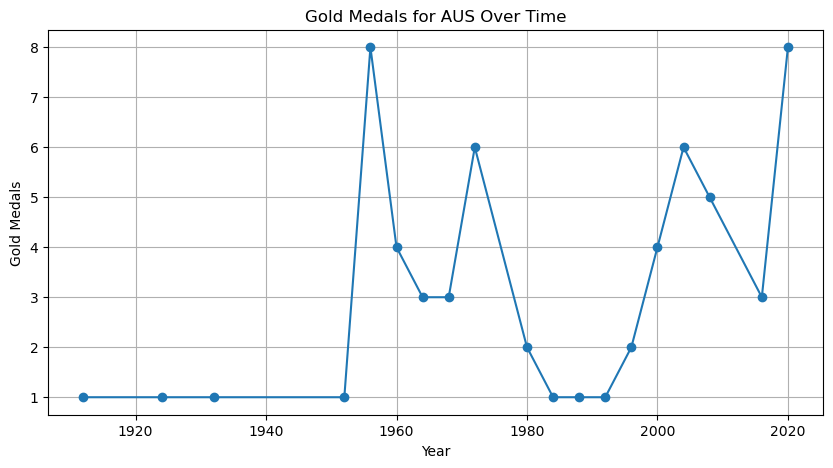

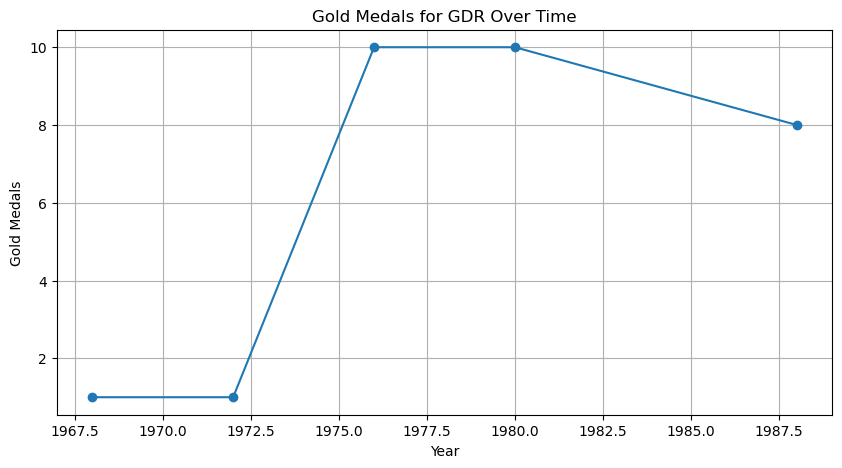

In [21]:
# Plot historical data for each country
for country in top_3_countries:
    country_data = gold_medals_per_country[gold_medals_per_country['Team'] == country]
    plt.figure(figsize=(10, 5))
    plt.plot(country_data['Year'], country_data['Gold_Medals'], marker='o')
    plt.title(f"Gold Medals for {country} Over Time")
    plt.xlabel("Year")
    plt.ylabel("Gold Medals")
    plt.grid(True)
    plt.show()

In [22]:
# Prepare a dictionary to store the models and future predictions for each country
country_forecasts = {}

# Loop through each of the top 3 countries to fit a Prophet model and make a prediction for 2024
for country in gold_medals_per_country['Team'].unique():
    # Filter data for the specific country
    country_data = gold_medals_per_country[gold_medals_per_country['Team'] == country]

     # Prepare data for Prophet
    df_prophet = country_data[['Year', 'Gold_Medals']].rename(columns={'Year': 'ds', 'Gold_Medals': 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet(yearly_seasonality=False)  # Turn off yearly seasonality
    model.add_seasonality(name='Olympic', period=4*365.25, fourier_order=3)  # Custom four-year seasonality
    model.fit(df_prophet)
    
    # Create a dataframe to hold the future dates (next Olympics, 4 years later)
    future = model.make_future_dataframe(periods=1, freq='4Y')
    
    # Predict the future values
    forecast = model.predict(future)
    
    # Filter the forecast for the next Olympics (2024)
    forecast_next_olympics = forecast[forecast['ds'].dt.year == 2024]
    
    # Ensure that the forecast for the next Olympics is available
    if not forecast_next_olympics.empty:
        country_forecasts[country] = forecast_next_olympics[['ds', 'yhat']].iloc[0]
    else:
        print(f"No forecast available for {country} in the next Olympics")

# Convert the forecasts to a DataFrame for easy viewing
if country_forecasts:  # Check if the dictionary is not empty
    forecast_df = pd.DataFrame.from_dict(country_forecasts, orient='index').reset_index()
    forecast_df.columns = ['Team', 'Date', 'Predicted_Gold_Medals']
    print(forecast_df)
else:
    print("No forecasts were generated.")

    

21:00:44 - cmdstanpy - INFO - Chain [1] start processing
21:00:44 - cmdstanpy - INFO - Chain [1] done processing
21:00:45 - cmdstanpy - INFO - Chain [1] start processing
21:00:45 - cmdstanpy - INFO - Chain [1] done processing


No forecast available for AUS in the next Olympics


21:00:45 - cmdstanpy - INFO - Chain [1] start processing
21:00:45 - cmdstanpy - INFO - Chain [1] done processing


No forecast available for USA in the next Olympics
No forecast available for GDR in the next Olympics
No forecasts were generated.


In [23]:
# Event Gender Comparison: 
# How do male and female performance trends compare in specific swimming events?
# Recall gold medalist
df_gold = df.loc[df["Rank"] == 1]



In [24]:
# Filter for specific events
df_backstroke100 = df[(df['Distance (in meters)'] == '100m') & (df['Stroke'] == 'Backstroke')]
df_backstroke200 = df[(df['Distance (in meters)'] == '200m') & (df['Stroke'] == 'Backstroke')]
df_butterfly100 = df[(df['Distance (in meters)'] == '100m') & (df['Stroke'] == 'Butterfly')]
df_butterfly200 = df[(df['Distance (in meters)'] == '200m') & (df['Stroke'] == 'Butterfly')]
df_freestyle50 = df[(df['Distance (in meters)'] == '50m') & (df['Stroke'] == 'Freestyle')]
df_freestyle100 = df[(df['Distance (in meters)'] == '100m') & (df['Stroke'] == 'Freestyle')]
df_freestyle200 = df[(df['Distance (in meters)'] == '200m') & (df['Stroke'] == 'Freestyle')]
df_freestyle400 = df[(df['Distance (in meters)'] == '400m') & (df['Stroke'] == 'Freestyle')]
df_freestyle800 = df[(df['Distance (in meters)'] == '800m') & (df['Stroke'] == 'Freestyle')]
df_freestyle1500 = df[(df['Distance (in meters)'] == '100m') & (df['Stroke'] == 'Freestyle')]
df_breaststroke100 = df[(df['Distance (in meters)'] == '100m') & (df['Stroke'] == 'Breaststroke')]
df_breaststroke200 = df[(df['Distance (in meters)'] == '200m') & (df['Stroke'] == 'Breaststroke')]
df_medley200 = df[(df['Distance (in meters)'] == '200m') & (df['Stroke'] == 'Individual medley')]
df_medley400 = df[(df['Distance (in meters)'] == '400m') & (df['Stroke'] == 'Individual medley')]

# Display the DataFrames
print("100m Backstroke Data:")
print(df_backstroke100)

print("200m Backstroke Data:")
print(df_backstroke200)

print("100m Butterfly Data:")
print(df_butterfly100)

print("200m Butterfly Data:")
print(df_butterfly200)

print("50m Freestyle Data:")
print(df_freestyle50)

print("100m Freestyle Data:")
print(df_freestyle100)

print("200m Freestyle Data:")
print(df_freestyle200)

print("400m Freestyle Data:")
print(df_freestyle400)

print("800m Freestyle Data:")
print(df_freestyle800)

print("1500m Freestyle Data:")
print(df_freestyle1500)

print("100m Breaststroke Data:")
print(df_breaststroke100)

print("200m Breaststroke Data:")
print(df_breaststroke200)

print("200m Individual medley Data:")
print(df_medley200)

print("400m Individual medley Data:")
print(df_medley400)

100m Backstroke Data:
       Location Distance (in meters)      Stroke  Relay? Gender Team  \
Year                                                                   
2020      Tokyo                 100m  Backstroke       0    Men  ROC   
2020      Tokyo                 100m  Backstroke       0    Men  ROC   
2020      Tokyo                 100m  Backstroke       0    Men  USA   
2020      Tokyo                 100m  Backstroke       0    Men  ITA   
2020      Tokyo                 100m  Backstroke       0    Men  CHN   
...         ...                  ...         ...     ...    ...  ...   
1912  Stockholm                 100m  Backstroke       0    Men  HUN   
1912  Stockholm                 100m  Backstroke       0    Men  GER   
1912  Stockholm                 100m  Backstroke       0    Men  GER   
1912  Stockholm                 100m  Backstroke       0    Men  HUN   
1912  Stockholm                 100m  Backstroke       0    Men  BEL   

                 Athlete  Results  Rank  

In [25]:
# Create a function to calculate average results
def calculate_average_results(event_df):
    return event_df.groupby('Gender')['Results'].mean().reset_index()

# Calculate average results for each event
avg_backstroke100 = calculate_average_results(df_backstroke100)
avg_backstroke100['Event'] = '100m Backstroke'

avg_backstroke200 = calculate_average_results(df_backstroke200)
avg_backstroke200['Event'] = '200m Backstroke'

avg_butterfly100 = calculate_average_results(df_butterfly100)
avg_butterfly100['Event'] = '100m Butterfly'

avg_butterfly200 = calculate_average_results(df_butterfly200)
avg_butterfly200['Event'] = '200m Butterfly'

avg_freestyle50 = calculate_average_results(df_freestyle50)
avg_freestyle50['Event'] = '50m Freestyle'

avg_freestyle100 = calculate_average_results(df_freestyle100)
avg_freestyle100['Event'] = '100m Freestyle'

avg_freestyle200 = calculate_average_results(df_freestyle200)
avg_freestyle200['Event'] = '200m Freestyle'

avg_freestyle400 = calculate_average_results(df_freestyle400)
avg_freestyle400['Event'] = '400m Freestyle'

avg_freestyle800 = calculate_average_results(df_freestyle800)
avg_freestyle800['Event'] = '800m Freestyle'

avg_freestyle1500 = calculate_average_results(df_freestyle1500)
avg_freestyle1500['Event'] = '1500m Freestyle'

avg_breaststroke100 = calculate_average_results(df_breaststroke100)
avg_breaststroke100['Event'] = '100m Breaststroke'

avg_breaststroke200 = calculate_average_results(df_breaststroke200)
avg_breaststroke200['Event'] = '200m Breaststroke'

avg_medley200 = calculate_average_results(df_medley200)
avg_medley200['Event'] = '200m Individual Medley'

avg_medley400 = calculate_average_results(df_medley400)
avg_medley400['Event'] = '400m Individual Medley'

In [26]:
# Combine all average results into a single DataFrame
combined_results = pd.concat([
    avg_backstroke100, avg_backstroke200, avg_butterfly100,
    avg_butterfly200, avg_freestyle50, avg_freestyle100,
    avg_freestyle200, avg_freestyle400, avg_freestyle800,
    avg_freestyle1500, avg_breaststroke100, avg_breaststroke200,
    avg_medley200, avg_medley400
], 
ignore_index=True)


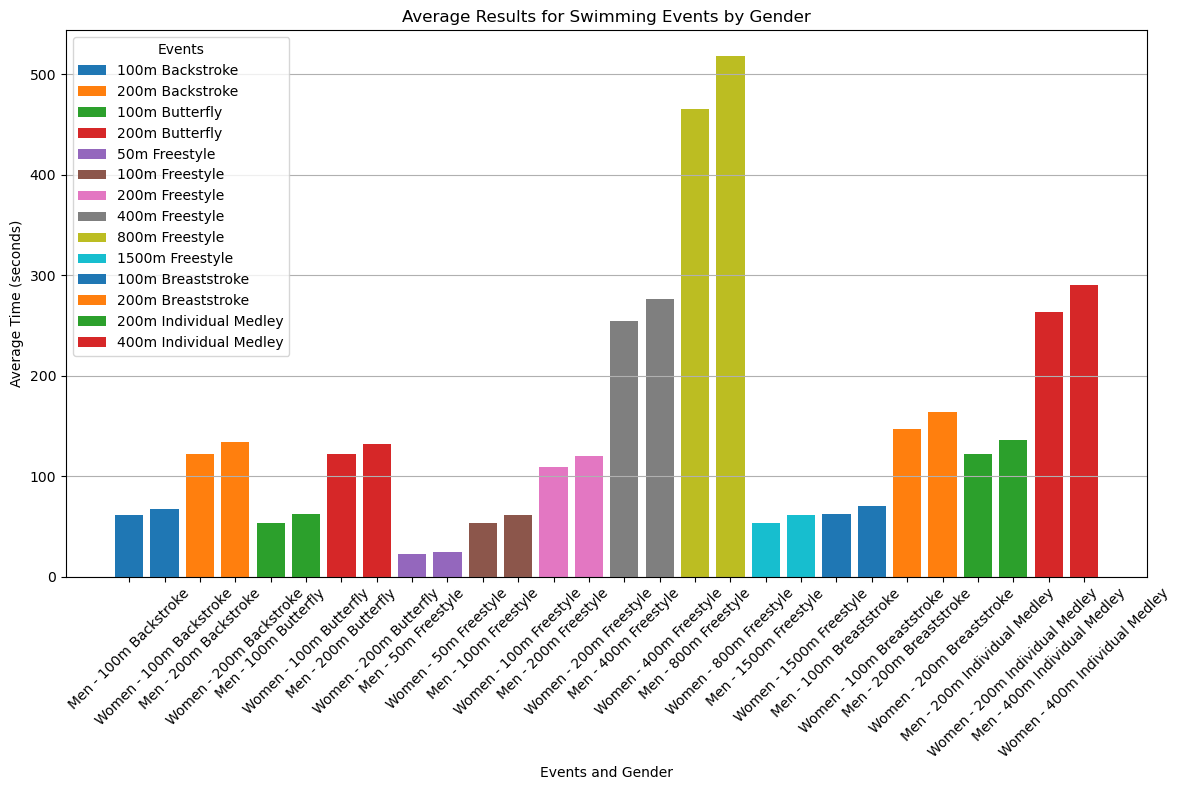

In [27]:
# Plotting the Comparison
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors  # Use a color map for distinct colors

# Loop over unique events and plot averages
for i, event in enumerate(combined_results['Event'].unique()):
    subset = combined_results[combined_results['Event'] == event]
    plt.bar(subset['Gender'] + ' - ' + subset['Event'], subset['Results'], 
            color=colors[i % len(colors)], label=event)

plt.title('Average Results for Swimming Events by Gender')
plt.xlabel('Events and Gender')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.legend(title='Events')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

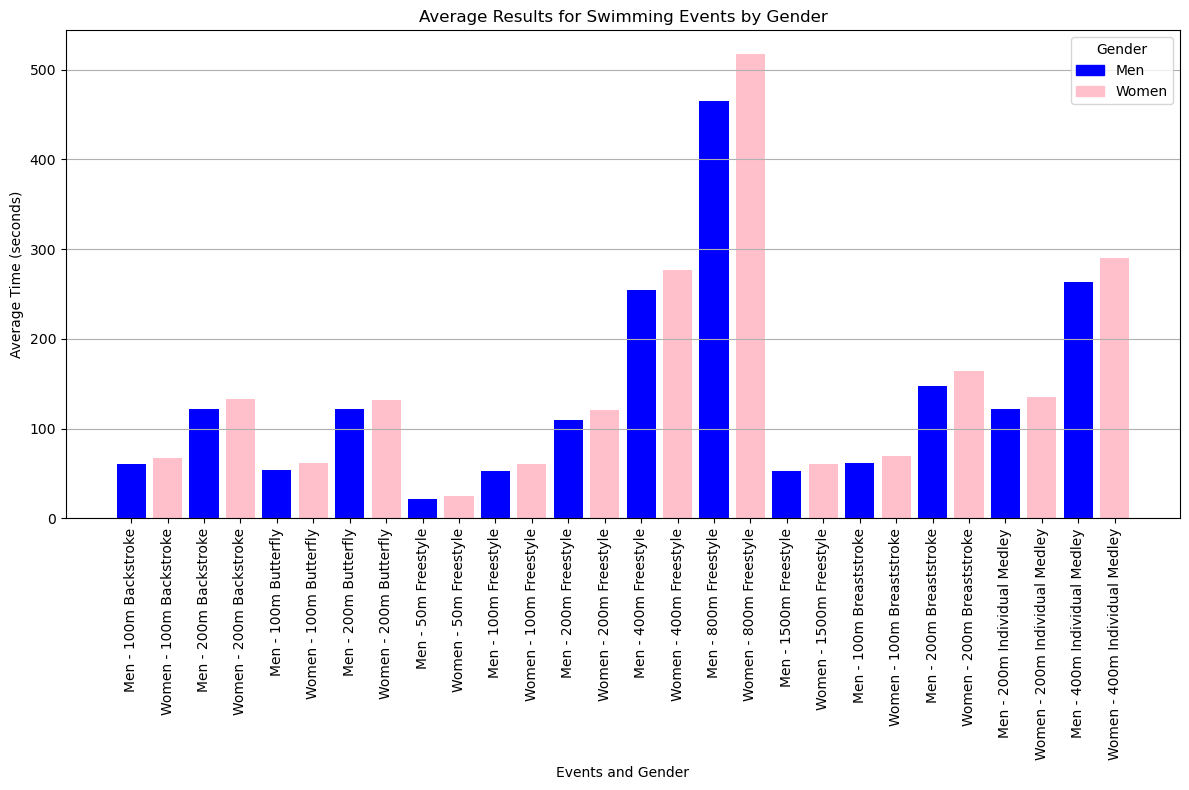

In [28]:
# Plotting the Comparison
plt.figure(figsize=(12, 8))

# Define colors for men and women
color_map = {'Men': 'blue', 'Women': 'pink'}

# Loop over unique events and plot averages
for event in combined_results['Event'].unique():
    subset = combined_results[combined_results['Event'] == event]
    plt.bar(subset['Gender'] + ' - ' + subset['Event'], 
            subset['Results'], 
            color=subset['Gender'].map(color_map),  # Map colors based on gender
            label=event if event not in plt.gca().get_legend_handles_labels()[1] else "")  # Avoid duplicate labels

plt.title('Average Results for Swimming Events by Gender')
plt.xlabel('Events and Gender')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=90)
# Create handles and labels manually
handles = [plt.Rectangle((0,0),1,1, color='blue'), plt.Rectangle((0,0),1,1, color='pink')]
labels = ['Men', 'Women']
plt.legend(handles, labels, title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()